<a href="https://colab.research.google.com/github/palemabhineshreddy/Machine_Learning/blob/master/fashion_minist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fashionmnist'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
base_dir


'/content/gdrive/My Drive/fashionmnist'

In [4]:
%cd /content/gdrive/My\ Drive/BreastCancer

[Errno 2] No such file or directory: '/content/gdrive/My Drive/BreastCancer'
/content


In [5]:
!pwd

/content


In [6]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Input

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [0]:
data = pd.read_csv('/content/gdrive/My Drive/fashionmnist/fashion-mnist_train.csv')
data = data.values
np.random.shuffle(data)


In [10]:
data

array([[4, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
X = data[:, 1:].reshape(-1, 28, 28, 1) / 255.0
Y = data[:, 0].astype(np.int32)

In [0]:
X

In [0]:
K = len(set(Y))
def y2indicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I
Y = y2indicator(Y)



In [14]:
K

10

In [15]:
# make the CNN
i = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=(3, 3))(i)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(filters=64, kernel_size=(3, 3))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dense(units=100)(x)
x = Activation('relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=K)(x)
x = Activation('softmax')(x)

model = Model(inputs=i, outputs=x)













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [17]:
# note: multiple ways to choose a backend
# either theano, tensorflow, or cntk
# https://keras.io/backend/


# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X, Y, validation_split=0.33, epochs=15, batch_size=32)
print("Returned:", r)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40199 samples, validate on 19801 samples
Epoch 1/15
40199/40199 [==============================] - 16s 386us/step - loss: 0.5421 - acc: 0.8079 - val_loss: 0.3811 - val_acc: 0.8570
Epoch 2/15
40199/40199 [==============================] - 9s 228us/step - loss: 0.3827 - acc: 0.8618 - val_loss: 0.3293 - val_acc: 0.8805
Epoch 3/15
40199/40199 [==============================] - 9s 218us/step - loss: 0.3357 - acc: 0.8779 - val_loss: 0.3104 - val_acc: 0.8852
Epoch 4/15
40199/40199 [==============================] - 9s 218us/step - loss: 0.3069 - acc: 0.8889 - val_loss: 0.2748 - val_acc: 0.8969
Epoch 5/15
40199/40199 [==============================] - 9s 220us/step - loss: 0.2837 - acc: 0.8964 - val_loss: 0.2889 - val_acc: 0.8954
Epoch 6/15
40199/40199 [==============================] - 9s 217us/step - loss: 0.2665 - acc: 0.9014 - val_loss: 0.2807 - val_acc: 0.8954
Epoch 7/15
40199/40199 [=

In [18]:
# print the available keys
# should see: dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])
print(r.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


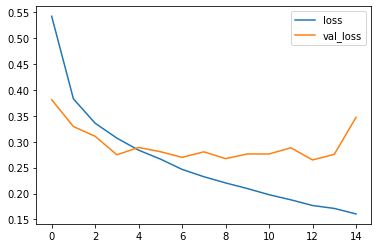

In [19]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

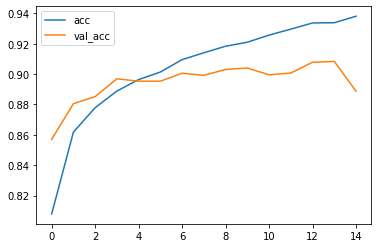

In [20]:
# accuracies
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()